<a href="https://colab.research.google.com/github/XO-ID/UTS_3scene_obed/blob/main/Obed_Rhesa_2101191020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/UTS-SLO

/content/drive/MyDrive/UTS-SLO


In [2]:
ls

3scene@  UTS.ipynb


In [3]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image
from imutils import paths
import numpy as np
import os
import tensorflow as tf
import random

In [4]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [5]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 #bisa pasang preprocessing disini jika mau, seperti filterring, dll
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [6]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [7]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [9]:
print(np.array(data).shape)

(948, 128, 128, 3)


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)
(711, 3)
(237, 3)


In [11]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
print(base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [12]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout

#model = Sequential(
    #[
        #Flatten(input_shape=(128*128*3,)),
        #Dense(256, activation="relu"),
        #Dense(128, activation="relu"),
        #Dropout(0.3),
        #Dense(64, activation="relu"),
        #Dense(32, activation="relu"),
        #Dropout(0.3),
        #Dense(16, activation="relu"),
        #Dense(8, activation="sigmoid"),
        #Dense(3, activation = "softmax"),
    #]
#)

In [13]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
preds = tf.keras.layers.Dense(3, activation ='softmax')(x)

In [14]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-2, decay=1e-3)
#opt = optimizers.SGD(lr=0.01, decay=1e-2/50, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


[INFO] training network...


In [16]:
#trainY
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=1000, batch_size=56)

Epoch 1/1000
13/13 [==============================] - 15s 458ms/step - loss: 2.5239 - accuracy: 0.3594 - val_loss: 2034997934998515875840.0000 - val_accuracy: 0.3797
Epoch 2/1000
13/13 [==============================] - 3s 215ms/step - loss: 1.0258 - accuracy: 0.5371 - val_loss: 391920362717184.0000 - val_accuracy: 0.3797
Epoch 3/1000
13/13 [==============================] - 3s 217ms/step - loss: 0.8953 - accuracy: 0.5773 - val_loss: 12862960640.0000 - val_accuracy: 0.3797
Epoch 4/1000
13/13 [==============================] - 3s 217ms/step - loss: 0.6818 - accuracy: 0.7213 - val_loss: 14775049.0000 - val_accuracy: 0.3797
Epoch 5/1000
13/13 [==============================] - 3s 218ms/step - loss: 0.5371 - accuracy: 0.7837 - val_loss: 88918.0391 - val_accuracy: 0.3797
Epoch 6/1000
13/13 [==============================] - 3s 219ms/step - loss: 0.6119 - accuracy: 0.7360 - val_loss: 20617.8203 - val_accuracy: 0.3038
Epoch 7/1000
13/13 [==============================] - 3s 219ms/step - loss:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


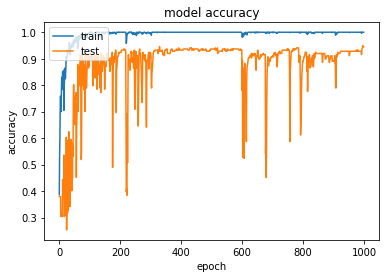

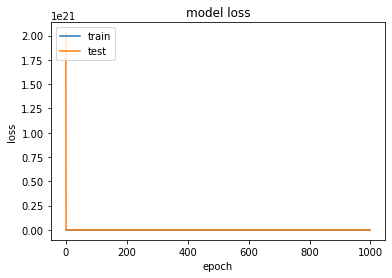

In [19]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=56)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.92      0.94      0.93        90
      forest       0.96      1.00      0.98        75
     highway       0.96      0.89      0.92        72

    accuracy                           0.95       237
   macro avg       0.95      0.94      0.95       237
weighted avg       0.95      0.95      0.94       237

